In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/inc-5000-companies/INC 5000 Companies 2019.csv


# INC 5000 Companies
## Indroduction
The dataset is about Inc 5000 companies listed in 2019 year. we are trying to explore the dataset and find the useful
insight, but one doubt is there that what is excatly Inc 5000 companies?
-> The Inc. 5000 lists the 5,000 fastest-growing private companies in the US. The Inc. 5000 is ranked according to percentage revenue growth over a three-year period. To qualify, companies must have been founded and generating revenue by the first week of the starting calendar year, and therefore able to show three full calendar years of sales. Additionally, they have to be U.S.-based, privately held, and independent—not subsidiaries or divisions of other companies—as of December 31 of the last year measured. Revenue in the initial year must have been at least $100,000

In [3]:
df=pd.read_csv("/kaggle/input/inc-5000-companies/INC 5000 Companies 2019.csv")

# Data Understanding

**The columns in the dataset are:**

- rank: The rank of the company on the list
- profile: A short description of the company
- name: The name of the company
- url: The website of the company
- state: The state where the company is located
- revenue: The revenue of the company in millions of dollars
- growth_%: The percentage growth of the company's revenue from the previous year
- industry: The industry that the company operates in
- workers: The number of workers employed by the company
- previous_workers: The number of workers employed by the company in the previous year
- founded: The year that the company was founded
- yrs_on_list: The number of years that the company has been on the list
- metro: The metropolitan area where the company is located
- city: The city where the company is located

In [4]:
df.head()

,rank,profile,name,url,state,revenue,growth_%,industry,workers,previous_workers,founded,yrs_on_list,metro,city
0,1,https://www.inc.com/profile/freestar,Freestar,http://freestar.com,AZ,36.9 Million,36680.3882,Advertising & Marketing,40.0,5,2015,1,Phoenix,Phoenix
1,2,https://www.inc.com/profile/freightwise,FreightWise,http://freightwisellc.com,TN,33.6 Million,30547.9317,Logistics & Transportation,39.0,8,2015,1,Nashville,Brentwood
2,3,https://www.inc.com/profile/ceces-veggie,Cece's Veggie Co.,http://cecesveggieco.com,TX,24.9 Million,23880.4852,Food & Beverage,190.0,10,2015,1,Austin,Austin
3,4,https://www.inc.com/profile/ladyboss,LadyBoss,http://ladyboss.com,NM,32.4 Million,21849.8925,Consumer Products & Services,57.0,2,2014,1,NaN,Albuquerque
4,5,https://www.inc.com/profile/perpay,Perpay,http://perpay.com,PA,22.5 Million,18166.4070,Retail,25.0,6,2014,1,Philadelphia,Philadelphia


In [5]:
df.shape

(5012, 14)

Dataset have 5012 rows and 14 columns

In [6]:
df.describe()

,rank,growth_%,workers,previous_workers,founded,yrs_on_list
count,5012.000000,5012.000000,5011.000000,5012.000000,5012.000000,5012.000000
mean,2499.628292,454.680059,242.783077,111.687151,2005.445531,2.813647
std,1443.232009,1284.288709,2800.165478,1073.878175,30.310632,2.265986
min,1.000000,52.169100,0.000000,1.000000,0.000000,1.000000
25%,1249.750000,90.562500,22.000000,8.000000,2003.000000,1.000000
50%,2497.500000,157.530650,48.000000,20.000000,2009.000000,2.000000
75%,3749.250000,330.427250,116.000000,50.000000,2012.000000,4.000000
max,5000.000000,36680.388200,155000.000000,53000.000000,2016.000000,14.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5012 entries, 0 to 5011
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              5012 non-null   int64  
 1   profile           5012 non-null   object 
 2   name              5012 non-null   object 
 3   url               5012 non-null   object 
 4   state             5012 non-null   object 
 5   revenue           5012 non-null   object 
 6   growth_%          5012 non-null   float64
 7   industry          5012 non-null   object 
 8   workers           5011 non-null   float64
 9   previous_workers  5012 non-null   int64  
 10  founded           5012 non-null   int64  
 11  yrs_on_list       5012 non-null   int64  
 12  metro             4199 non-null   object 
 13  city              5012 non-null   object 
dtypes: float64(2), int64(4), object(8)
memory usage: 548.3+ KB


In [8]:
df.isna().sum()

rank                  0
profile               0
name                  0
url                   0
state                 0
revenue               0
growth_%              0
industry              0
workers               1
previous_workers      0
founded               0
yrs_on_list           0
metro               813
city                  0
dtype: int64

In the dataset null values is in two column, metro and workers.

# Data Preprocessing

Change the data type
We will change the datatype of revenue from obect to numeric(float)

In [9]:
df['revenue']=df['revenue'].replace({'Million':"","Billion":"*1000"},regex=True).map(pd.eval)
print(df['revenue'].dtype)


float64


In [10]:
df.rename(columns = {'revenue':'revenue_in_millions'}, inplace = True)

In [11]:
df.head()

,rank,profile,name,url,state,revenue_in_millions,growth_%,industry,workers,previous_workers,founded,yrs_on_list,metro,city
0,1,https://www.inc.com/profile/freestar,Freestar,http://freestar.com,AZ,36.9,36680.3882,Advertising & Marketing,40.0,5,2015,1,Phoenix,Phoenix
1,2,https://www.inc.com/profile/freightwise,FreightWise,http://freightwisellc.com,TN,33.6,30547.9317,Logistics & Transportation,39.0,8,2015,1,Nashville,Brentwood
2,3,https://www.inc.com/profile/ceces-veggie,Cece's Veggie Co.,http://cecesveggieco.com,TX,24.9,23880.4852,Food & Beverage,190.0,10,2015,1,Austin,Austin
3,4,https://www.inc.com/profile/ladyboss,LadyBoss,http://ladyboss.com,NM,32.4,21849.8925,Consumer Products & Services,57.0,2,2014,1,NaN,Albuquerque
4,5,https://www.inc.com/profile/perpay,Perpay,http://perpay.com,PA,22.5,18166.4070,Retail,25.0,6,2014,1,Philadelphia,Philadelphia


In [12]:
print(df['revenue_in_millions'].dtype)

float64


#### Dealing with missing value
Metro variable contain almost 16.30% missing value so we will substitute the null value with the mode value and
workers variable contian missing value less than 0.02% so simply remove the null value as missing is very less

In [13]:
mode_value = df['metro'].mode()  # calculate the mode of metro variable
df['metro'].fillna(mode_value[0], inplace = True)    # replace the null value with mode value

# now check the null value
print('Null value in metro variable:',df['metro'].isna().sum())

# remove the null value from workers column
df.dropna(axis = 0, inplace = True)
print('Null value in metro variable:',df['workers'].isna().sum())

Null value in metro variable: 0
Null value in metro variable: 0


Inference: Now in dataset there is no null value as null value in metro is replace by mode and workers null value are removed

#### Remove the unwanted column
As the profile and url column have no use, it will be better to drop that column frim the dataset

In [14]:
df.drop(['profile','url'],axis=1, inplace=True)
df.head()


,rank,name,state,revenue_in_millions,growth_%,industry,workers,previous_workers,founded,yrs_on_list,metro,city
0,1,Freestar,AZ,36.9,36680.3882,Advertising & Marketing,40.0,5,2015,1,Phoenix,Phoenix
1,2,FreightWise,TN,33.6,30547.9317,Logistics & Transportation,39.0,8,2015,1,Nashville,Brentwood
2,3,Cece's Veggie Co.,TX,24.9,23880.4852,Food & Beverage,190.0,10,2015,1,Austin,Austin
3,4,LadyBoss,NM,32.4,21849.8925,Consumer Products & Services,57.0,2,2014,1,New York City,Albuquerque
4,5,Perpay,PA,22.5,18166.4070,Retail,25.0,6,2014,1,Philadelphia,Philadelphia


# Data Visualization

Import Libraries

In [15]:
# for vizualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

### What's the average revenue among companies on the list? Broken down by industry?

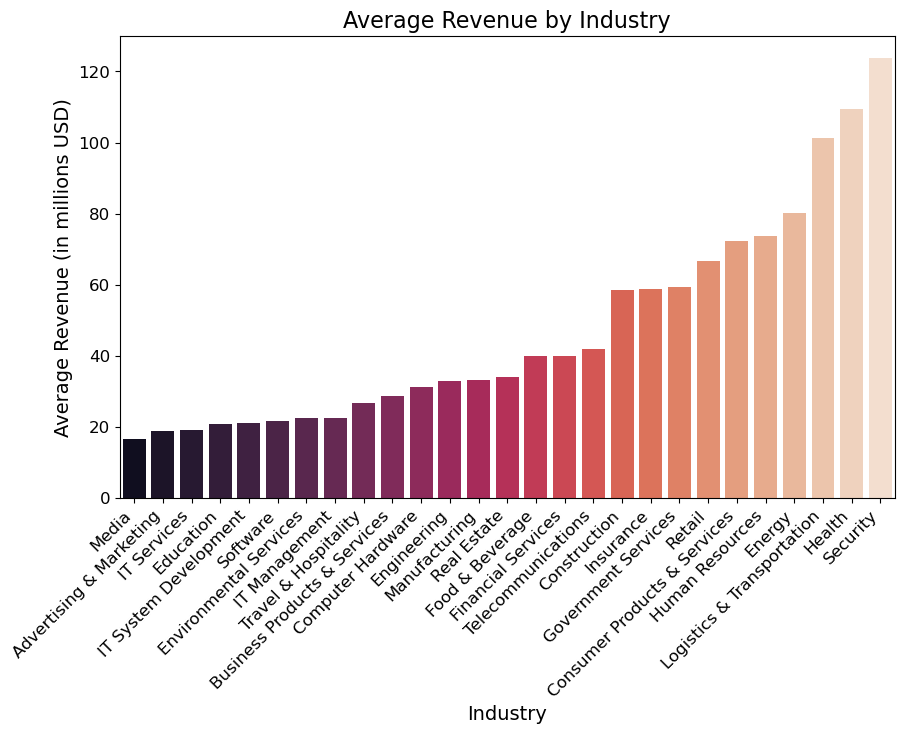

In [24]:
#  Calculate average revenue by industry
industry_revenue = df.groupby('industry')['revenue_in_millions'].mean().sort_values()

# Create a bar chart with seaborn
# sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.barplot(x=industry_revenue.index, y=industry_revenue.values, palette="rocket")
plt.title('Average Revenue by Industry', fontsize=16)
plt.xlabel('Industry', fontsize=14)
plt.ylabel('Average Revenue (in millions USD)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

The highest average revenue is in the Security industry at 145 million dollars, followed by Health at 127 million dollars and Logistics & Transportation at 97 million dollars. On the other hand, Advertising & Marketing has the lowest average revenue at 19 million dollars, followed by Education at 17 million dollars and Media at 18 million dollars.

### Which industries are most and least represented in the list?

In [25]:
industry_counts = df['industry'].value_counts()
print(industry_counts)

Business Products & Services    492
Advertising & Marketing         489
Software                        461
Health                          356
Construction                    350
Consumer Products & Services    314
IT Management                   276
Financial Services              239
Government Services             236
Real Estate                     198
Logistics & Transportation      186
Manufacturing                   181
Retail                          163
Human Resources                 157
Food & Beverage                 127
IT System Development           120
Engineering                      81
Telecommunications               79
Energy                           78
Insurance                        70
Education                        70
Security                         67
Travel & Hospitality             57
Media                            46
Environmental Services           43
IT Services                      43
Computer Hardware                32
Name: industry, dtype: int64

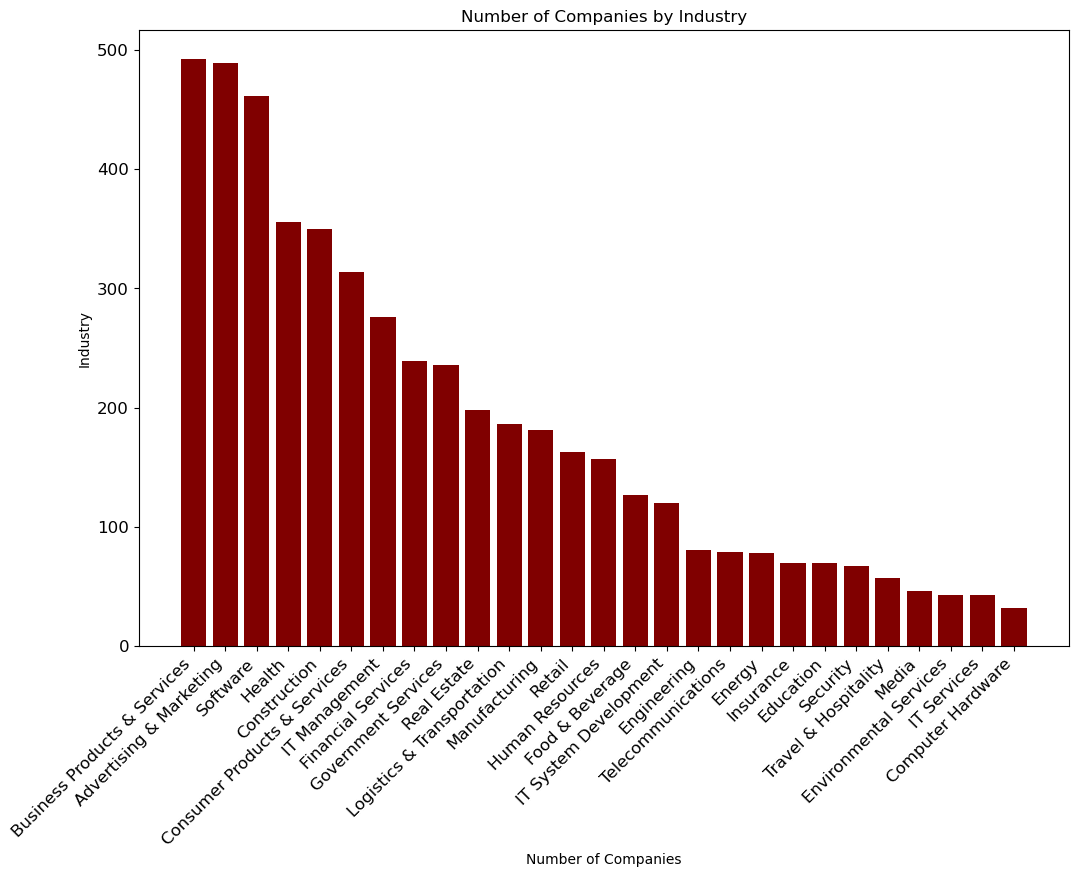

In [44]:
plt.figure(figsize=(12, 8))
plt.bar(industry_counts.index, industry_counts.values, color='maroon')
plt.title('Number of Companies by Industry')
plt.xlabel('Number of Companies')
plt.ylabel('Industry')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

##### The most represented industries on the list:

Business Products & Services
Advertising & Marketing
Software
Each of these industries has over 400 companies listed.

##### On the other hand, the least represented industries on the list are:

Environmental Services
IT Services
Computer Hardware
Each of these industries has less than 40 companies listed.

### Do you notice any interesting geographic trends?

In [28]:
state_counts = df['state'].value_counts()
print(state_counts)

CA    712
TX    467
FL    384
NY    300
VA    288
IL    241
GA    219
PA    172
OH    160
CO    156
NC    135
MA    133
MD    130
NJ    128
UT    123
AZ    104
WA    101
TN     84
MI     82
MN     81
MO     75
AL     64
IN     63
OR     59
SC     56
WI     49
DC     43
CT     37
LA     37
KY     34
NV     33
IA     31
OK     28
KS     27
NE     27
ID     21
NH     20
SD     14
DE     11
ME     11
MT     11
ND     10
AR     10
NM      7
WV      7
WY      6
VT      5
RI      5
MS      4
HI      4
PR      2
Name: state, dtype: int64


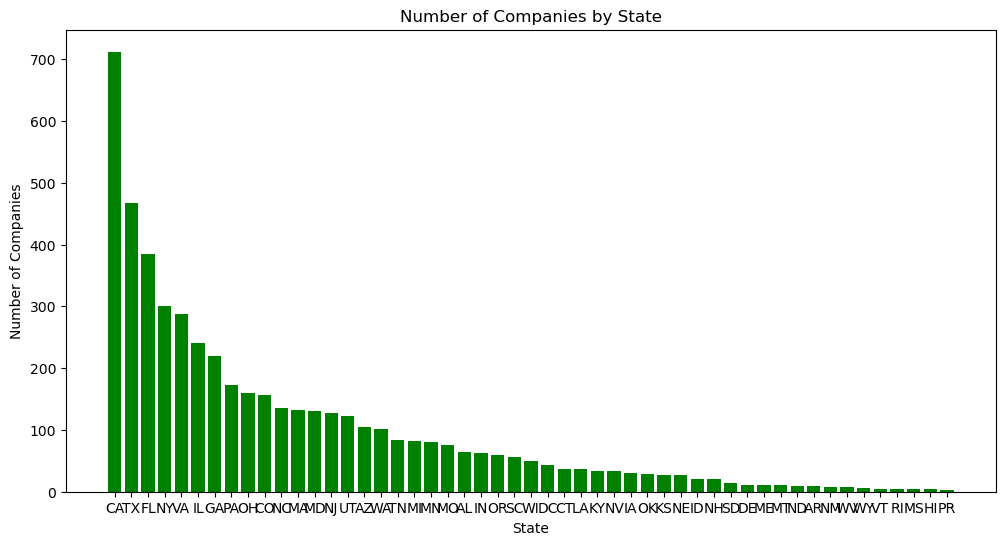

In [29]:
state_counts = df['state'].value_counts()

plt.figure(figsize=(12,6))
plt.bar(state_counts.index, state_counts.values, color='green')
plt.title('Number of Companies by State')
plt.xlabel('State')
plt.ylabel('Number of Companies')
plt.show()

##### The top 5 states with the highest number of companies in the dataset are

California (712), 
Texas (467),
Florida (384),
New York (300), and
Virginia (288).

##### It appears that these states have a higher concentration of companies in the dataset compared to other states. The lowest number of companies in the dataset is found in

Mississippi,
Hawaii, and
Pennsylvania,
each with only one company.

In [30]:
# reference- https://plotly.com/python/choropleth-maps/
state_counts = df['state'].value_counts().reset_index()
state_counts.columns = ['state', 'count']

fig = px.choropleth(state_counts, locationmode="USA-states", locations="state", color="count",
                    scope="usa", title='Number of Companies by State')
fig.show()

### Which industries saw the largest average growth rate?

In [31]:
industry_growth = df.groupby('industry')['growth_%'].mean().sort_values(ascending=False)
top_industries = industry_growth.head(10)
print(top_industries)

industry
Logistics & Transportation      717.563346
Consumer Products & Services    687.534860
Food & Beverage                 668.225534
Computer Hardware               651.975244
Energy                          592.075591
Retail                          584.823802
Health                          546.911881
Software                        524.673761
Telecommunications              515.411890
Security                        490.193593
Name: growth_%, dtype: float64


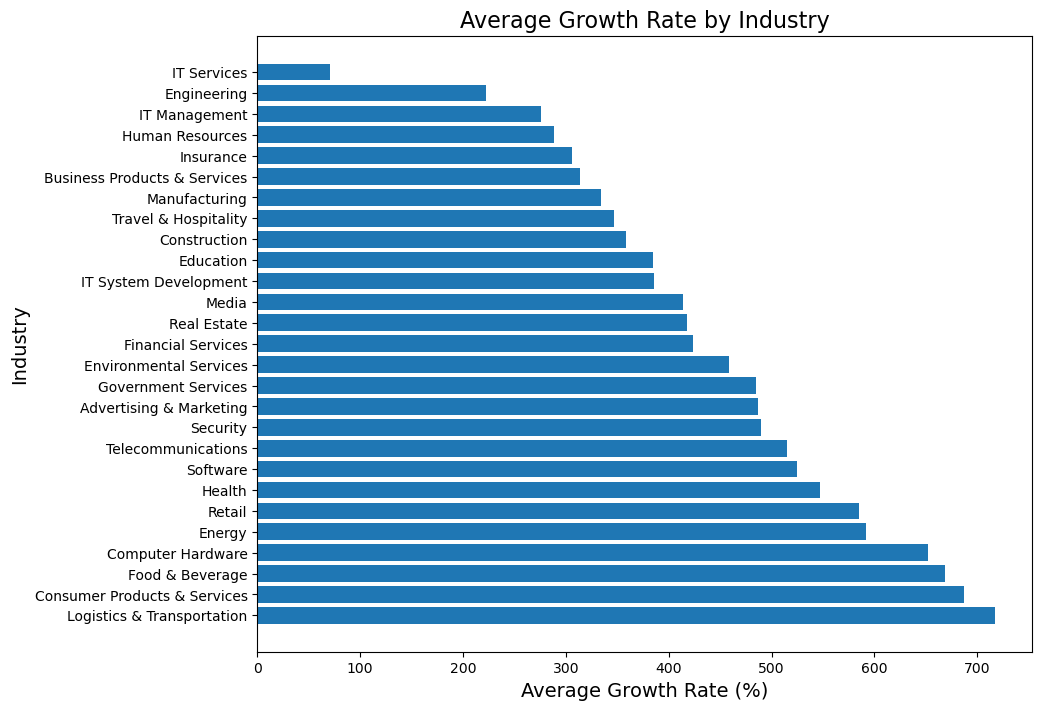

In [32]:
# create horizontal bar chart
plt.figure(figsize=(10,8))
plt.barh(industry_growth.index, industry_growth.values)
plt.title('Average Growth Rate by Industry', fontsize=16)
plt.xlabel('Average Growth Rate (%)', fontsize=14)
plt.ylabel('Industry', fontsize=14)
plt.show()

- From the top 10 industries with the largest average growth rate, we can see that logistics and **transportation, food and beverage, and consumer products and services** had the largest average growth rates, all above **600%**.
- Retail, telecommunications, health, energy, security, software, and government services also had impressive average growth rates, all above 500%.
- This information can be useful for investors, entrepreneurs, and other stakeholders looking to identify industries with high growth potential.

### Which companies had the largest increase in staff/new hires?

In [33]:
df['new_hires'] = df['workers'] - df['previous_workers']
largest_new_hires = df[['name', 'industry', 'new_hires']].sort_values(by='new_hires', ascending=False).head(10)
print(largest_new_hires)

                         name                      industry  new_hires
1621         Allied Universal                      Security   118531.0
3752                  Alorica  Business Products & Services    43000.0
3403              Infiniti HR               Human Resources    37145.0
1336               CircusTrix       Advertising & Marketing    13739.0
3172            ScribeAmerica                        Health    11641.0
1118                   TaskUs  Business Products & Services     9198.0
4110  Freddy's Frozen Custard               Food & Beverage     6494.0
427      Pathway Vet Alliance                        Health     4174.0
2927         Four Foods Group               Food & Beverage     3500.0
4985  Pacific Dental Services                        Health     3356.0


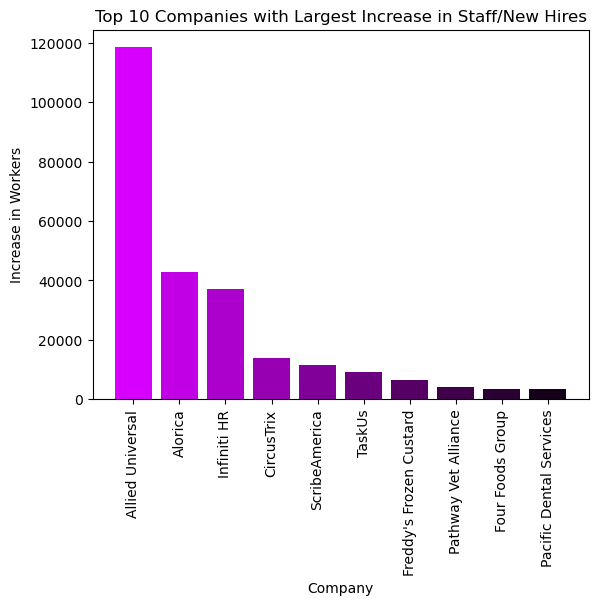

In [47]:
worker_changes = df.groupby('name')['workers'].max() - df.groupby('name')['previous_workers'].max()
worker_changes = worker_changes.sort_values(ascending=False)[:10]

# Create bar chart
plt.bar(worker_changes.index, worker_changes.values, color=['#d700ff', '#c100e5', '#ac00cc', '#9600b2', '#810099',
                                                           '#6b007f', '#560066', '#40004c', '#2b0033', '#150019'])

plt.xticks(rotation=90)
plt.xlabel('Company')
plt.ylabel('Increase in Workers')
plt.title('Top 10 Companies with Largest Increase in Staff/New Hires')
plt.show()

- The Allied Universal had the largest increase in staff/new hires among all the companies in the dataset with 118531 new hires.
- The Security industry seems to have the highest new hires on average, with two Security companies appearing in the top 10 list.

### Did any companies increase revenue while reducing staff?

In [38]:
df['worker_difference'] = df['workers'] - df['previous_workers']
df['revenue_difference'] = df['revenue_in_millions'] - df['revenue_in_millions'].shift(1)
revenue_and_staff = df[(df['worker_difference'] < 0) & (df['revenue_difference'] > 0)][['name', 'industry', 'revenue_difference', 'worker_difference']]
print(revenue_and_staff)

                                       name                      industry  \
361                               AdFicient       Advertising & Marketing   
525                       Quantico Tactical           Government Services   
1076                     Prime Therapeutics                        Health   
1159                            WealthForge            Financial Services   
1163                       Catalyst Outdoor       Advertising & Marketing   
1602                                 Taulia                      Software   
1671                         IT Authorities                 IT Management   
1732                                 Zentra                        Retail   
1741                     Worth Clark Realty                   Real Estate   
1833                         Perfect Snacks               Food & Beverage   
1973               Synapse Business Systems                 IT Management   
2026                            CloudSmartz                 IT Management   

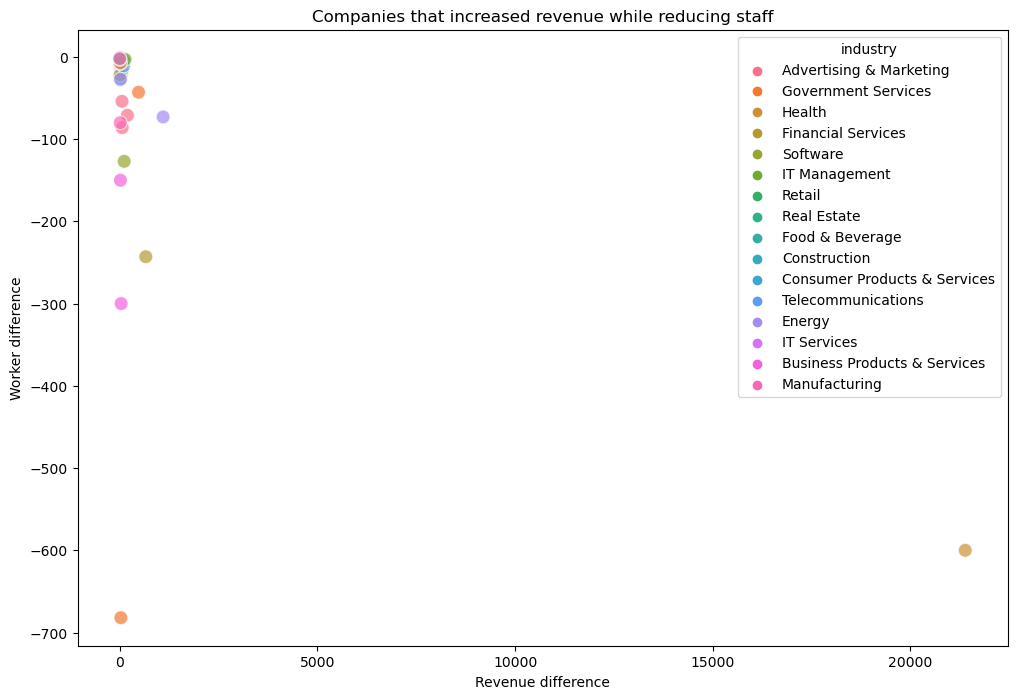

In [39]:
plt.figure(figsize=(12, 8))

sns.scatterplot(data=revenue_and_staff, x='revenue_difference', y='worker_difference', hue='industry', s=100, alpha=0.7)

plt.title('Companies that increased revenue while reducing staff')
plt.xlabel('Revenue difference')
plt.ylabel('Worker difference')

plt.show()

There are several companies that have increased their revenue while reducing staff. The industries of these companies include Advertising & Marketing, Financial Services, Software, Construction, and Telecommunications, among others. It is worth noting that some of these companies have reduced their workforce significantly, with worker differences as large as -682.0. However, the revenue differences for these companies are also substantial, with some companies experiencing revenue growth of over 1,000 million.

**Overall, this suggests that it is possible for companies to achieve revenue growth even while reducing their workforce, although this does not necessarily imply that this is a desirable outcome.**

### Conclusion
**Based on the exploratory data analysis (EDA) performed on the companies dataset, the following conclusions can be drawn:**

- The dataset contains information on over 5000 companies from various industries, with data on their revenue, number of workers, and other relevant information.
- The average revenue for companies in the dataset is around $3.5 billion, with a wide range of values from less than 10 million to over 300 billion.
- The technology industry has the highest number of companies in the dataset, followed by financial services and healthcare.
- There is a positive correlation between revenue and number of workers, but there are also many outliers where companies have high revenue with relatively few workers.
- Some companies in the dataset have been able to increase their revenue while reducing staff, but these cases are relatively rare.
- There is a wide range of revenue growth rates among the companies in the dataset, with some companies experiencing very high growth rates while others are experiencing negative growth.
- Overall, the dataset provides a useful starting point for further analysis and investigation into the factors that contribute to a company's success or failure.